# Project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import control 
import sympy
import os
import scipy
import cvxpy 
import sympy.plotting
import array_to_latex as a2l
import cvxpy 
# plt.rcParams['text.usetex'] = True

SAVE_PATH = 'tex-report/src/figs/'
os.makedirs(SAVE_PATH, exist_ok=True)
np.set_printoptions(precision=2)
sympy.init_printing()
p = sympy.Symbol("p")
s = sympy.Symbol("s")
t = sympy.Symbol("t")
w = sympy.Symbol("w")
I = sympy.I


def get_t(end_t = 10, dt=0.001, start_t = 0):
    return np.linspace(start_t, end_t, int(end_t / dt))

## Task1 

In [2]:
m = 0.1
M = 1
g = 10
l = 1

A = np.array([
    [0, 1, 0, 0],
    [0, 0, m*g / M, 0],
    [0, 0, 0, 1],
    [0, 0, (M+m)*g / (M*l), 0]
])
B = np.array([
    [0],
    [1/M],
    [0],
    [1/(M*l)]
])
D = np.array([
    [0],
    [1/(M*l)],
    [0],
    [(M+m)/(M*m*l**2)]
])

C = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

print(f'\[A = {a2l.to_ltx(A, print_out=False, frmt = "{:.0f}")}; B = {a2l.to_ltx(B, print_out=False, frmt = "{:.0f}")}; D = {a2l.to_ltx(D, print_out=False, frmt = "{:.0f}")}; C = {a2l.to_ltx(C, print_out=False, frmt = "{:.0f}")}\]')

\[A = \begin{bmatrix}
  0  &  1  &  0  &  0 \\
  0  &  0  &  1  &  0 \\
  0  &  0  &  0  &  1 \\
  0  &  0  &  11  &  0 
\end{bmatrix}; B = \begin{bmatrix}
  0 \\
  1 \\
  0 \\
  1 
\end{bmatrix}; D = \begin{bmatrix}
  0 \\
  1 \\
  0 \\
  11 
\end{bmatrix}; C = \begin{bmatrix}
  1  &  0  &  0  &  0 \\
  0  &  0  &  1  &  0 
\end{bmatrix}\]


## Task2 

2.1

In [3]:
np.linalg.eigvals(A)
print(f'\[\sigma(A) = {a2l.to_ltx(np.linalg.eigvals(A), print_out=False, frmt = "{:.1f}")}; v(A) = {a2l.to_ltx(np.linalg.eig(A)[1], print_out=False, frmt = "{:.1f}")} \]')
np.linalg.matrix_rank(control.ctrb(A, B)) == A.shape[0], np.linalg.matrix_rank(control.obsv(A, C)) == A.shape[0]

\[\sigma(A) = \begin{bmatrix}
  0.0 &  0.0 &  3.3 & -3.3
\end{bmatrix}; v(A) = \begin{bmatrix}
  1.0 & -1.0 &  0.0 & -0.0\\
  0.0 &  0.0 &  0.1 &  0.1\\
  0.0 &  0.0 &  0.3 & -0.3\\
  0.0 &  0.0 &  1.0 &  1.0
\end{bmatrix} \]


(True, True)

2.2

In [35]:
def tf_to_symbolic_fraction(num, den):
    x =sympy.symbols('s')
    
    length_num = len(num) 
    length_den = len(den) 

    sym_num, sym_den = 0,0

    if(length_num == 0):
        raise ValueError ("The fraction num should not be empty")
    elif(length_den == 0 ):
        raise ValueError("The fraction den should not be empty")

    counter = 1
    for i in range(length_num):
        sym_num+= round(num[i], 2) * (x**(length_num - counter))
        counter += 1
        
    counter = 1
    for i in range(length_den):
        sym_den+=round(den[i], 2) * (x**(length_den - counter))
        counter += 1
    return sym_num / sym_den

In [36]:
ss_u = control.ss(A, B, C ,np.zeros((2,1)))
tf_u = control.tfdata(control.ss2tf(ss_u))
print('\\[\\underset{u \\to y}W = \\begin{bmatrix}', sympy.latex(tf_to_symbolic_fraction(tf_u[0][0][0], tf_u[1][0][0])),'\\\\', sympy.latex(tf_to_symbolic_fraction(tf_u[0][1][0], tf_u[1][1][0])), '\\end{bmatrix} \\]')
ss_f = control.ss(A, D, C ,np.zeros((2,1)))
tf_f = control.tfdata(control.ss2tf(ss_f))
print('\\[\\underset{f \\to y}W = \\begin{bmatrix}', sympy.latex(tf_to_symbolic_fraction(tf_f[0][0][0], tf_f[1][0][0])),'\\\\', sympy.latex(tf_to_symbolic_fraction(tf_f[0][1][0], tf_f[1][1][0])), '\\end{bmatrix} \\]')

\[\underset{u \to y}W = \begin{bmatrix} \frac{1.0 s^{2} - 10.0}{1.0 s^{4} - 11.0 s^{2}} \\ \frac{1.0 s^{2}}{1.0 s^{4} - 11.0 s^{2}} \end{bmatrix} \]
\[\underset{f \to y}W = \begin{bmatrix} \frac{1.0}{1.0 s^{2} - 11.0} \\ \frac{11.0}{1.0 s^{2} - 11.0} \end{bmatrix} \]


2.3

In [57]:
def linear_initial_response(ss, x0, ts):
    resp = control.initial_response(ss, T=ts, X0=x0)
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    for i in range(4):
        ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
        ax[i//2, i%2].plot(ts, resp.states[i]) 
        ax[i//2, i%2].set_xlabel('t') 
        ax[i//2, i%2].grid() 
        plt.savefig(f'{SAVE_PATH}/task2_3_{"_".join([str(x) for x in x0])}.jpg')

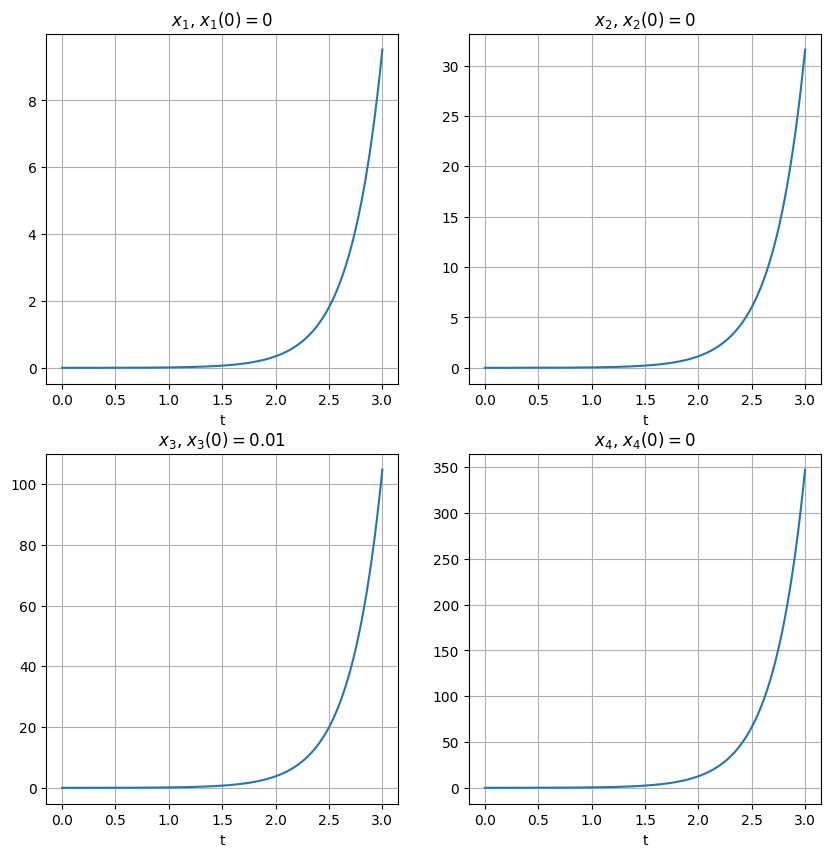

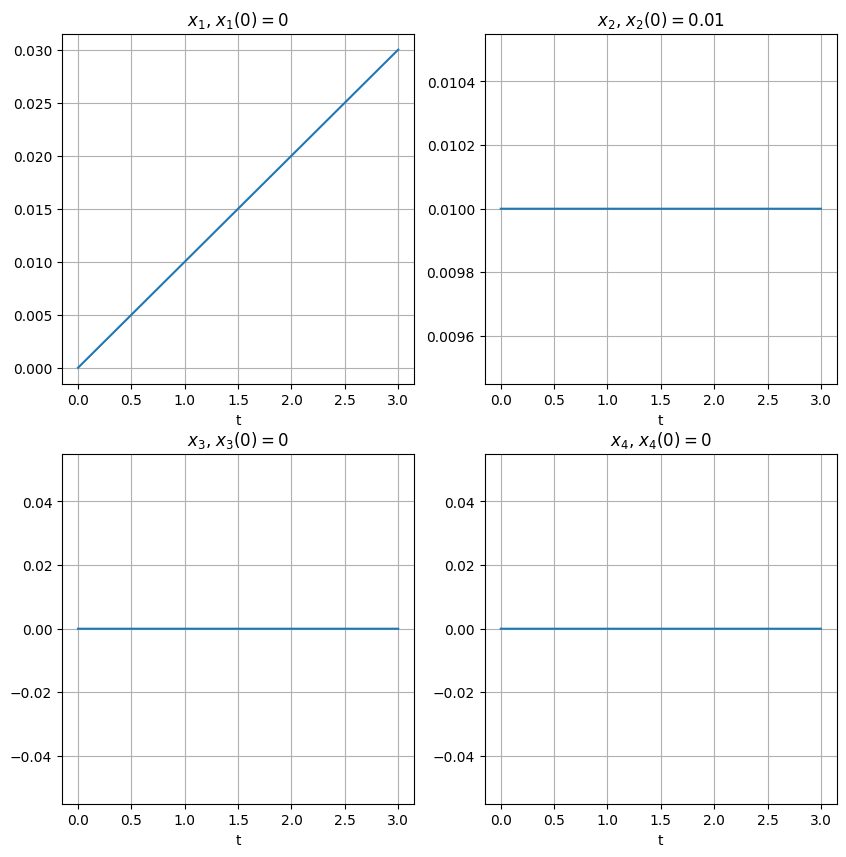

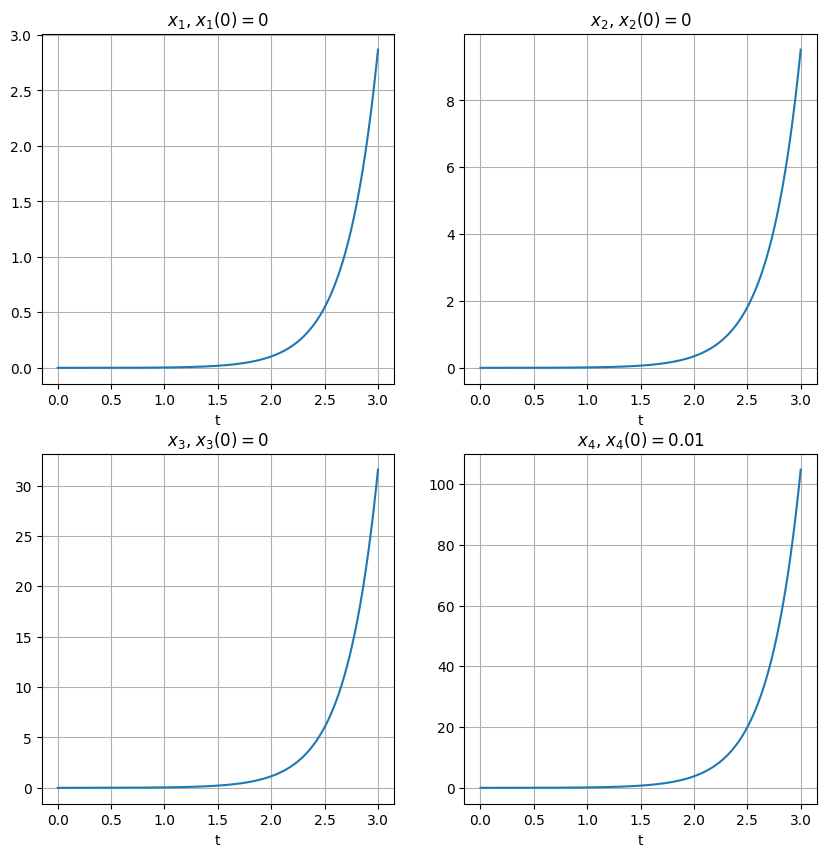

In [87]:
x0s = [[0, 0, 0.01, 0], [0, 0.01, 0, 0], [0, 0, 0, 0.01]]
ts = get_t(3)

for x0 in x0s:
    linear_initial_response(ss_u, x0, ts)

2.4

In [88]:
def non_linear_compare_initial_response(ss_lin, ss_non_lin, x0, ts):
    resp = control.initial_response(ss_lin, T=ts, X0=x0)
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    
    resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    for i in range(4):
        ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
        ax[i//2, i%2].plot(ts, resp.states[i], label='lin') 
        ax[i//2, i%2].plot(ts, resp_non_lin.states[i], label='nonlin') 
        
        ax[i//2, i%2].set_xlabel('t') 
        ax[i//2, i%2].grid() 
        ax[i//2, i%2].legend() 
        
        plt.savefig(f'{SAVE_PATH}/task2_4_{"_".join([str(x) for x in x0])}.jpg')

In [103]:
def up_func(t, x, u, params):
    ''' 
    u[0] -- u
    u[1] -- f
    '''
    return np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ])
ss_non_lin = control.NonlinearIOSystem(up_func)
ss_non_lin.set_inputs(2)

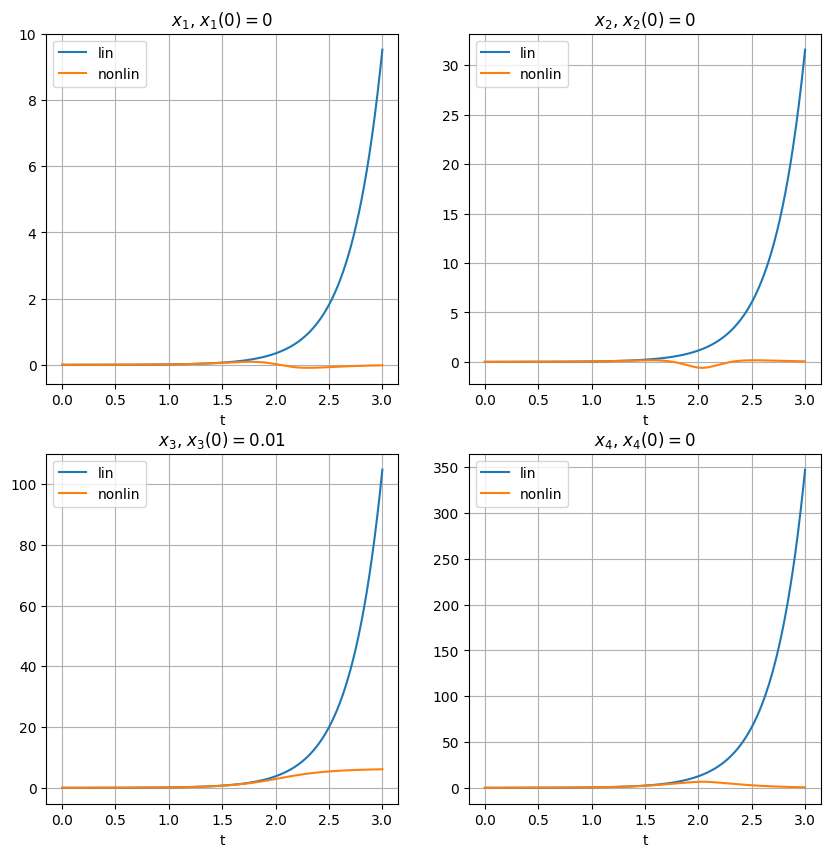

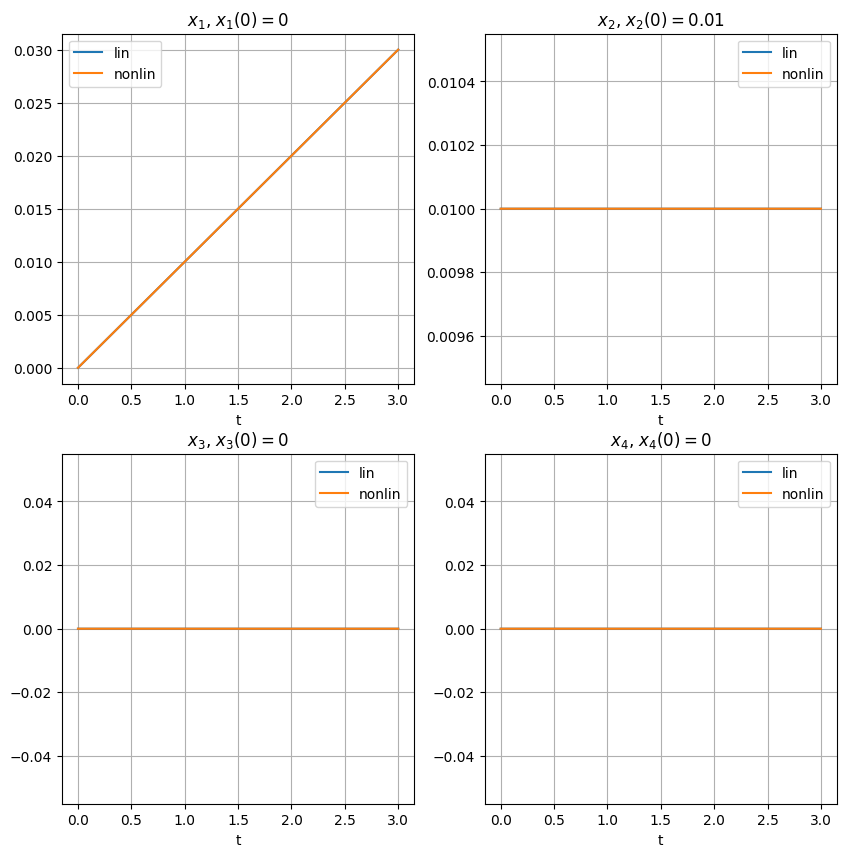

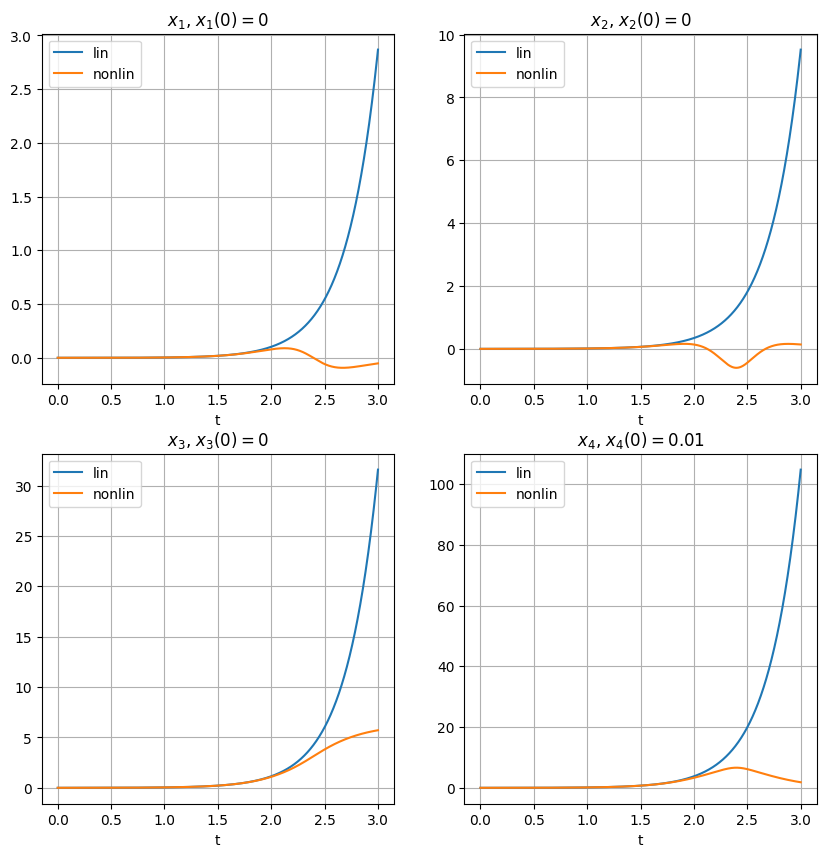

In [104]:
for x0 in x0s:
    non_linear_compare_initial_response(ss_u, ss_non_lin, x0, ts)

## Task3

3.1

In [105]:
def task3_get_K(A, B, G, Y):
    P= cvxpy.Variable(A.shape)
    objective = cvxpy.Minimize(cvxpy.sum_squares(A @ P - P @ G - B @ Y))
    prob = cvxpy.Problem(objective)
    print(f'Optimization error: {prob.solve()}, rankP = {np.linalg.matrix_rank(P.value)}')
    K = - Y @ np.linalg.pinv(P.value)
    print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
    print(f'\[spec(A + B K) = {a2l.to_ltx(np.linalg.eigvals(A + B @ K), print_out=False)}\]')
    return K

def task1_simulate(A, B, K, x0, ts):
    print(f'spec(A + B@K): {np.linalg.eigvals(A + B@K)}')
    ss = control.ss(A + B@K, A*0, A*0, A*0)
    return control.forced_response(ss, X0=x0, T=ts)

In [106]:
G = np.diag([-1, -2, -3, -4])
Y = np.ones((B.shape[1], A.shape[0]))
K = task3_get_K(A, B, G, Y)

Optimization error: 2.675501878742748e-30, rankP = 4
\[K = \begin{bmatrix}
  2.40 &  5.00 & -48.40 & -15.00
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -4.00 & -3.00 & -2.00 & -1.00
\end{bmatrix}\]


In [128]:
def up_func(t, x, u, params):
    ''' 
    u[0] -- u
    u[1] -- f
    '''
    K = params.get('K', np.zeros((1, 4)))
    u[0] = (K @ x).reshape(-1)[0]
    return np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ])
    
ss_non_lin = control.NonlinearIOSystem(up_func, params={"K": K})
ss_non_lin.set_inputs(2)

In [129]:
def non_linear_compare_mod_control(ss_lin, ss_non_lin, x0, ts):
    resp = control.initial_response(ss_lin, T=ts, X0=x0)
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    
    resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    for i in range(4):
        ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
        ax[i//2, i%2].plot(ts, resp.states[i], label='lin') 
        ax[i//2, i%2].plot(ts, resp_non_lin.states[i], label='nonlin') 
        
        ax[i//2, i%2].set_xlabel('t') 
        ax[i//2, i%2].grid() 
        ax[i//2, i%2].legend() 
        
        plt.savefig(f'{SAVE_PATH}/task3_1_{"_".join([str(x) for x in x0])}.jpg')

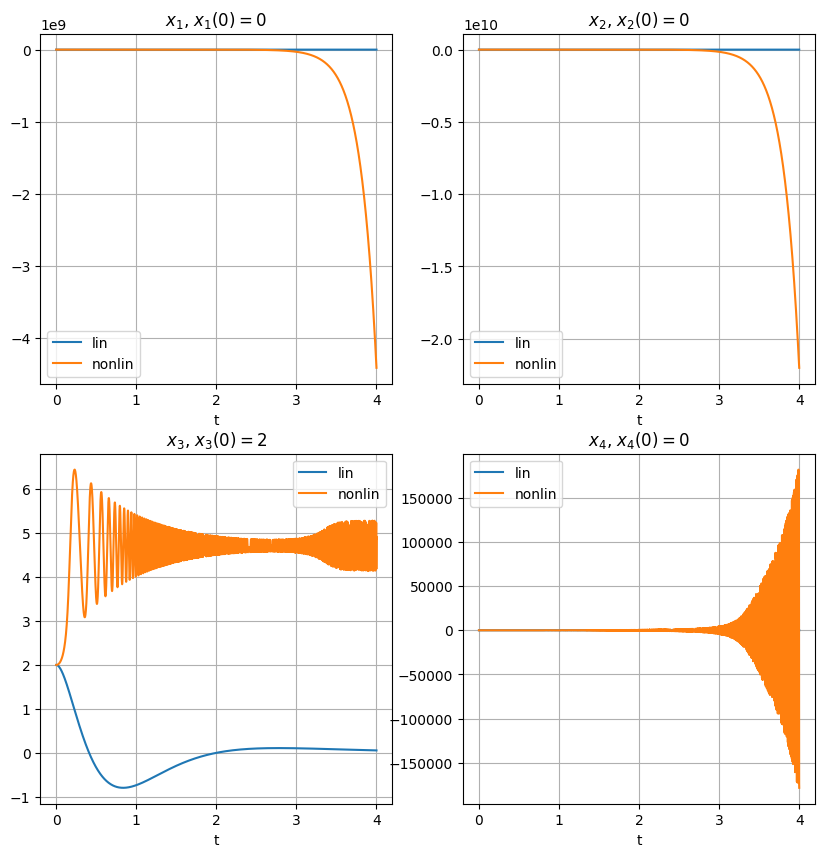

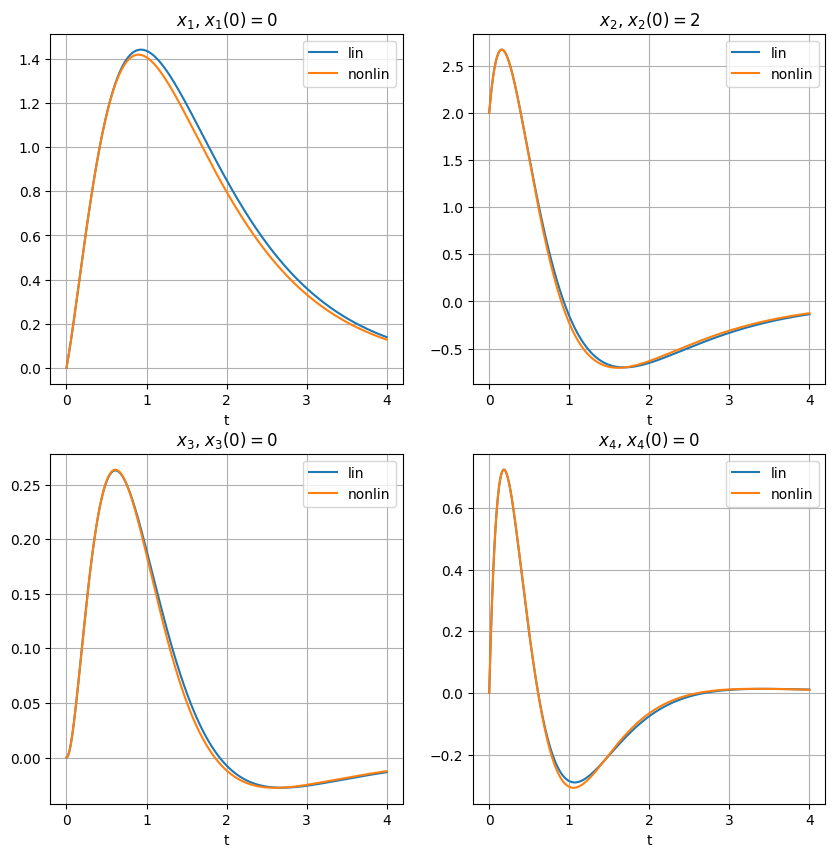

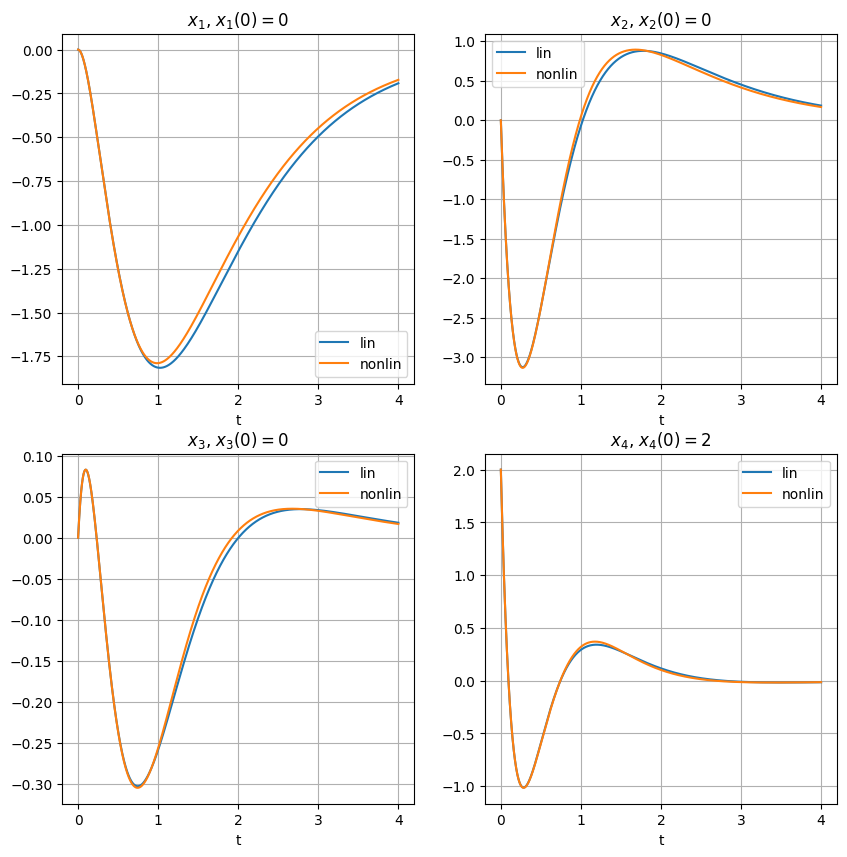

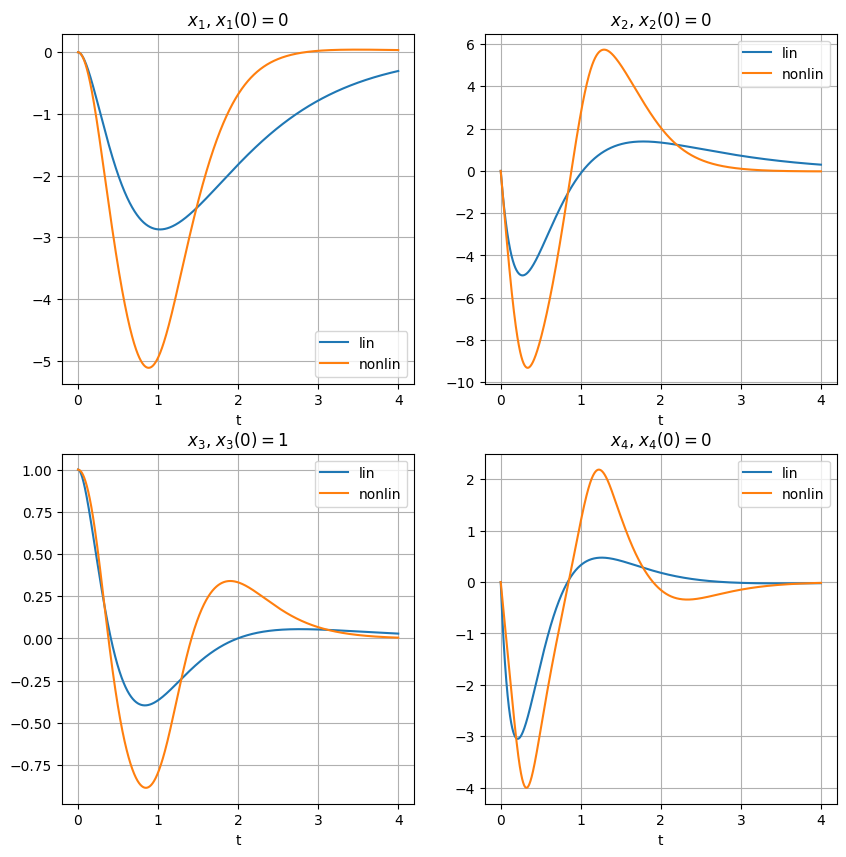

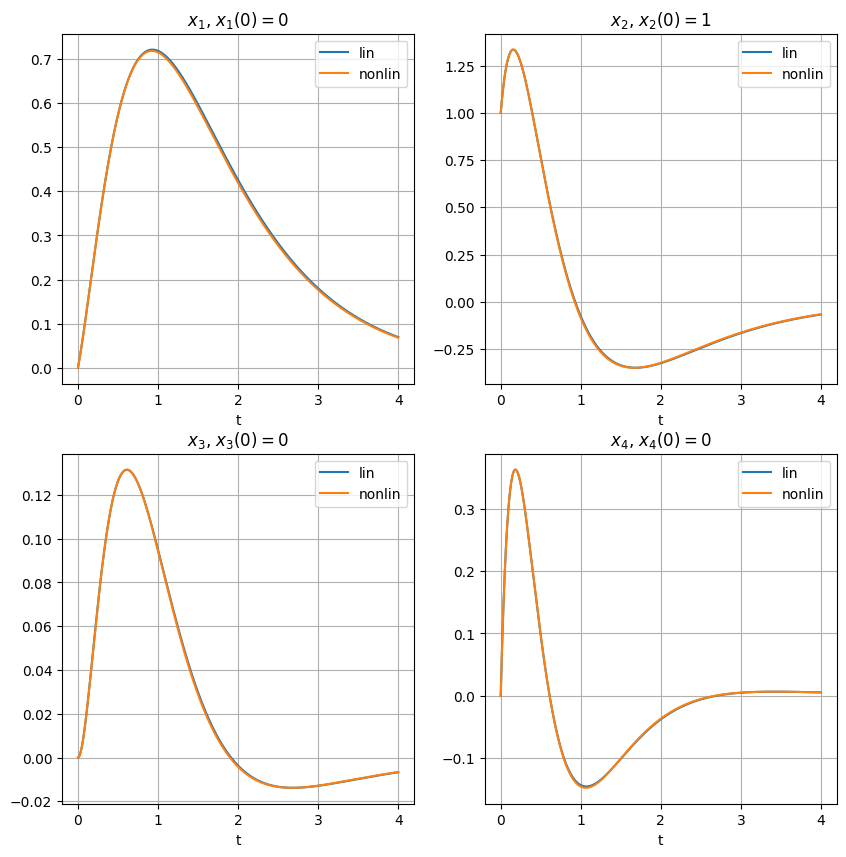

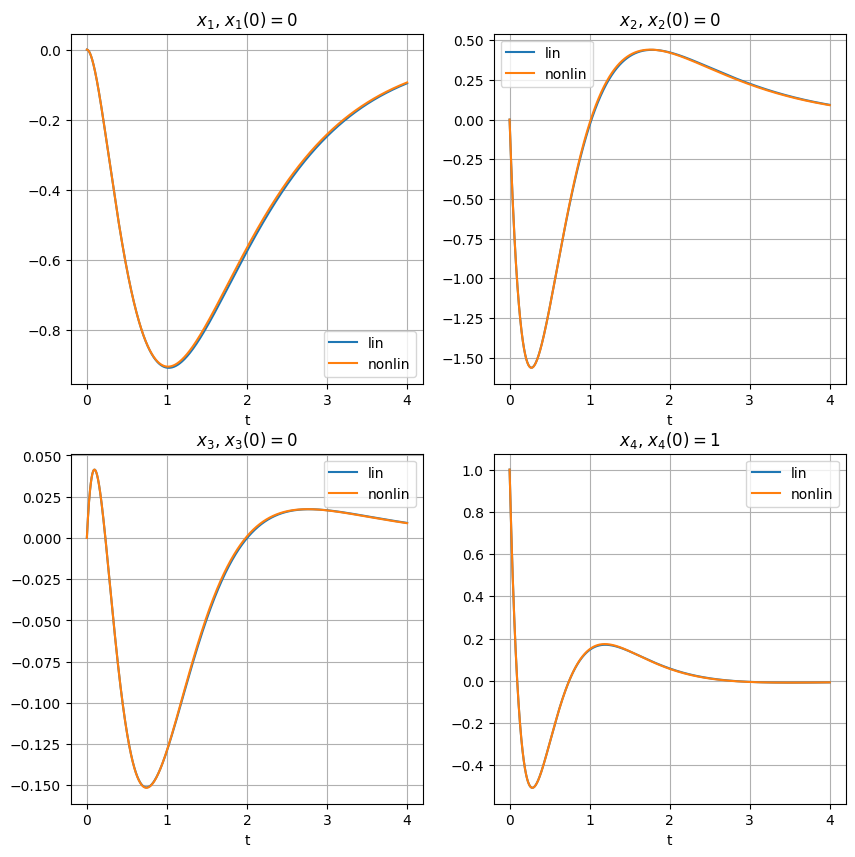

In [140]:
x0s = [[0, 0, 2, 0], [0, 2, 0, 0], [0, 0, 0, 2], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]]
ts = get_t(4)
ss_mod = control.ss(A + B @ K, np.zeros_like(A), np.zeros_like(A), np.zeros_like(A))
for x0 in x0s:
    non_linear_compare_mod_control(ss_mod, ss_non_lin, x0, ts)